# Shortlist and evaluate classifiers 

### Load training set and testing set data

In [1]:
import numpy as np
import pandas as pd

#Load all training data
X_train = pd.read_csv('Inputs\\train_test_sets\\training.csv')
y_train = X_train.pop('Label')
print(X_train.shape)

#Load all testing data
X_test = pd.read_csv('Inputs\\train_test_sets\\testing.csv')
y_test = X_test.pop('Label')
print(X_test.shape)

(999856, 71)
(1499016, 71)


In [2]:
X_train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Dst Port Class
0,80,6,24150,2,0,0.0,0.0,0.0,0.0,0.000000,...,32,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
1,80,6,731,2,0,0.0,0.0,0.0,0.0,0.000000,...,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
2,80,6,1691,2,0,0.0,0.0,0.0,0.0,0.000000,...,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
3,80,6,14485998,2,0,0.0,0.0,0.0,0.0,0.000000,...,32,0.0,0.000000,0.0,0.0,1.448600e+07,0.000000,14485998.0,14485998.0,0
4,443,6,116023373,33,73,682.0,85700.0,324.0,0.0,20.666667,...,20,50387.0,35392.936485,156420.0,28377.0,1.011212e+07,46587.864035,10192069.0,10035922.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999851,80,6,10924,2,0,0.0,0.0,0.0,0.0,0.000000,...,32,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
999852,80,6,12086,3,4,310.0,935.0,310.0,0.0,103.333333,...,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
999853,80,6,936764,3,4,20.0,964.0,20.0,0.0,6.666667,...,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0
999854,22,6,374567,24,22,1912.0,2665.0,640.0,0.0,79.666667,...,32,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0


### Preprocess the Training Set

The training set needs to be preprocessed so it would be compatible with large number of classifiers during the evaluation stage below

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from CustomFunctions import get_feature_names

#Identify numerical vs categorical columns
numericalColumns = X_train.columns
categoricalColumns = ['Protocol']
numericalColumns = numericalColumns.drop('Protocol')

#Processing for numerical columns
s = StandardScaler()
X_train1 = pd.DataFrame(s.fit_transform(X_train[numericalColumns]), index = X_train.index, columns=numericalColumns)

#Processing for categorical columns
encCat = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc_data = encCat.fit_transform(X_train[categoricalColumns])
enc_Columns = ['Protocol' + str(x) for x in encCat.categories_[0]]
X_train2 = pd.DataFrame(enc_data, index=X_train.index, columns=enc_Columns)

#Combine it all
X_train2 = X_train1.join(X_train2)

c:\Users\Delan\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Note:** A StandardScaler is used above to normalise all the data values of the training set. This might not be necessary for lot of the classifiers. But as we need to evaluate several different types of classifiers, we are using the StandardScaler as it should meet the requirements of almost all classifiers.

In [4]:
X_train2

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Dst Port Class,Protocol0,Protocol6,Protocol17
0,-0.433468,-0.297928,-0.037803,-0.109385,-0.039524,-0.017669,-0.736609,-0.15472,-0.822809,-0.764106,...,-0.056695,-0.048784,-0.275566,-0.077609,-0.278831,-0.270167,-0.574109,0.0,1.0,0.0
1,-0.433468,-0.299145,-0.037803,-0.109385,-0.039524,-0.017669,-0.736609,-0.15472,-0.822809,-0.764106,...,-0.056695,-0.048784,-0.275566,-0.077609,-0.278831,-0.270167,-0.574109,0.0,1.0,0.0
2,-0.433468,-0.299096,-0.037803,-0.109385,-0.039524,-0.017669,-0.736609,-0.15472,-0.822809,-0.764106,...,-0.056695,-0.048784,-0.275566,-0.077609,-0.278831,-0.270167,-0.574109,0.0,1.0,0.0
3,-0.433468,0.453685,-0.037803,-0.109385,-0.039524,-0.017669,-0.736609,-0.15472,-0.822809,-0.764106,...,-0.056695,-0.048784,0.803956,-0.077609,0.774442,0.816632,-0.574109,0.0,1.0,0.0
4,-0.411075,5.730802,-0.031192,1.971819,-0.035000,1.745514,0.549205,-0.15472,-0.464658,-0.121395,...,0.038831,-0.021547,0.478007,-0.045470,0.462232,0.482769,-0.574109,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999851,-0.433468,-0.298616,-0.037803,-0.109385,-0.039524,-0.017669,-0.736609,-0.15472,-0.822809,-0.764106,...,-0.056695,-0.048784,-0.275566,-0.077609,-0.278831,-0.270167,-0.574109,0.0,1.0,0.0
999852,-0.433468,-0.298555,-0.037589,0.004654,-0.037468,0.001568,0.493646,-0.15472,0.967946,0.951699,...,-0.056695,-0.048784,-0.275566,-0.077609,-0.278831,-0.270167,-0.574109,0.0,1.0,0.0
999853,-0.433468,-0.250498,-0.037589,0.004654,-0.039391,0.002164,-0.657238,-0.15472,-0.707276,-0.653409,...,-0.056695,-0.048784,-0.275566,-0.077609,-0.278831,-0.270167,-0.574109,0.0,1.0,0.0
999854,-0.437046,-0.279716,-0.033111,0.517827,-0.026841,0.037161,1.803271,-0.15472,0.557805,0.518914,...,-0.056695,-0.048784,-0.275566,-0.077609,-0.278831,-0.270167,-0.574109,0.0,1.0,0.0


In [5]:
y_train.value_counts()

Label
DoS attacks-Hulk          164962
DDOS attack-HOIC          156456
DDoS attacks-LOIC-HTTP    151250
Bot                       129813
Benign                    121965
Infilteration             120476
SSH-Bruteforce             84521
DoS attacks-GoldenEye      31131
FTP-BruteForce             29045
DoS attacks-Slowloris       8243
DDOS attack-LOIC-UDP        1298
Brute Force -Web             458
Brute Force -XSS             173
SQL Injection                 65
Name: count, dtype: int64

As we are evaluating different types of classifiers, it would be best to also encode the target class label (as there are some classifiers that expect the target class to be numerical)

In [6]:
def mapIDS_Classes(attackVectorName):
    match (attackVectorName):
        case 'Benign': return 0
        case 'Bot': return 1
        case 'SSH-Bruteforce': return 2
        case 'FTP-BruteForce': return 3
        case 'Brute Force -Web': return 4
        case 'Brute Force -XSS': return 5
        case 'DoS attacks-GoldenEye': return 6
        case 'DoS attacks-Slowloris': return 7
        case 'DoS attacks-Hulk': return 8
        case 'DDOS attack-HOIC': return 9
        case 'DDoS attacks-LOIC-HTTP': return 10
        case 'DDOS attack-LOIC-UDP': return 11
        case 'Infilteration': return 12
        case 'SQL Injection': return 13


y_train2 = y_train.apply(mapIDS_Classes)                         

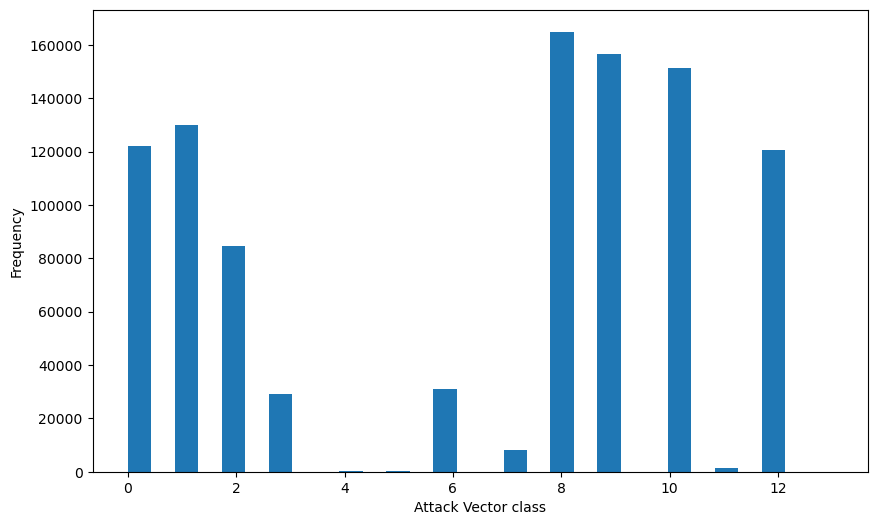

In [7]:
import matplotlib.pyplot as plt

#Visualise the distribution of the measures 
plt.figure(figsize=(10, 6))
y_train2.plot(kind='hist', bins=30)
plt.xlabel("Attack Vector class");


### Mutual Information

In [9]:
from sklearn.feature_selection import mutual_info_regression

#Returns Mutual Information scores for a DataFrame X and real-valued Target y (not a categorical target) 
def mutual_info_scores(X, y):

    #Convert all categorical columns to factorised integers
    X = X.copy()
    y = y.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    if (y.dtype == 'O'):
        y, _ = y.factorize()

    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi = mutual_info_regression(X, y, discrete_features=discrete_features, copy=False, random_state=0)
    mi = pd.Series(mi, name="MI Scores", index=X.columns)
    mi = mi.sort_values(ascending=False)
    return mi


mi_scores = mutual_info_scores(X_train2, y_train2)
# pd.set_option("display.max_rows", 200)
mi_scores[0:30]  # show top 20 features with highest MI score

Init Fwd Win Byts    1.546933
Flow IAT Mean        1.368214
Flow Duration        1.364974
Flow Pkts/s          1.359477
Fwd IAT Tot          1.345531
Flow IAT Max         1.343899
Fwd Pkts/s           1.317695
Fwd IAT Mean         1.295051
Fwd IAT Max          1.293139
Dst Port             1.279934
Fwd Header Len       1.225831
Fwd Pkt Len Mean     1.157329
Fwd Seg Size Avg     1.156134
TotLen Fwd Pkts      1.148925
Subflow Fwd Byts     1.148456
Pkt Len Std          1.147617
Pkt Len Var          1.146723
Pkt Len Mean         1.144964
Fwd Pkt Len Max      1.144448
Bwd Pkts/s           1.138868
Fwd IAT Min          1.132509
Pkt Size Avg         1.130984
Bwd Pkt Len Mean     1.102011
Bwd Seg Size Avg     1.101415
Fwd Pkt Len Std      1.093807
Subflow Bwd Byts     1.091592
Pkt Len Max          1.091455
TotLen Bwd Pkts      1.090152
Bwd Pkt Len Max      1.088549
Bwd Pkt Len Std      1.042659
Name: MI Scores, dtype: float64

According to the Mutual Information analysis above against the encoded class label, these variables have the highest mutual information:
Init Fwd Win Byts, Flow IAT Mean, Flow Duration, Flow Pkts/s, Flow IAT Max and Dst Port 


In [8]:
from collections import Counter
Counter(y_train2)

Counter({8: 164962,
         9: 156456,
         10: 151250,
         1: 129813,
         0: 121965,
         12: 120476,
         2: 84521,
         6: 31131,
         3: 29045,
         7: 8243,
         11: 1298,
         4: 458,
         5: 173,
         13: 65})

In [9]:
#Undersample with RandomUnderSampler 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification

requiredCounts = {  8: 10000,
                    9: 10000,
                    10: 10000,
                    1: 10000,
                    0: 10000,
                    12: 10000,
                    2: 10000,
                    6: 10000,
                    3: 10000,
                    7: 8243,
                    11: 1298,
                    4: 458,
                    5: 173,
                    13: 65}

underSampling = RandomUnderSampler(random_state=0, sampling_strategy=requiredCounts)

# transform the dataset
X_train3, y_train3 = underSampling.fit_resample(X_train2, y_train2)
y_train3.value_counts()

Label
0     10000
1     10000
2     10000
3     10000
6     10000
8     10000
9     10000
10    10000
12    10000
7      8243
11     1298
4       458
5       173
13       65
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score, matthews_corrcoef
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from CustomFunctions import Timer

#Define the cross validation scheme and scoring scheme to be used for all the model evaluations
cv = StratifiedKFold(n_splits = 4) 
f2_scorer = make_scorer(fbeta_score, beta=2, average='macro')
MCC_scorer = make_scorer(matthews_corrcoef)


#Shortlisted selection of classifiers
classifiers = [
    DummyClassifier(strategy="stratified"),
    DecisionTreeClassifier(class_weight='balanced', random_state=0),
    RandomForestClassifier(class_weight='balanced', random_state=0, n_jobs=10),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')),
    RidgeClassifier(class_weight='balanced', random_state=0),
    #GradientBoostingClassifier(),
    LinearSVC(multi_class='ovr', class_weight='balanced', random_state=0),
    LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=0, n_jobs=10),
    KNeighborsClassifier(n_neighbors=3, n_jobs=10),
    SVC(kernel="rbf", C=0.025, probability=True, class_weight='balanced', decision_function_shape='ovr'),
    GaussianNB(),
    XGBClassifier(scale_pos_weight=400, device='gpu'), 
    LGBMClassifier(class_weight='balanced', objective='multiclass'),
    CatBoostClassifier(loss_function='MultiClass')
    ]

#Evaluate each classifier
t = Timer()
for clf in classifiers:
    #Evaluate classifier
    t.start()
    clfName = str(clf).split('(')[0]
    clf_scores_F2 = cross_val_score(clf, X_train3, y_train3, cv=cv, scoring=f2_scorer, n_jobs=4)
    clf_scores_MCC = cross_val_score(clf, X_train3, y_train3, cv=cv, scoring=MCC_scorer, n_jobs=4)
    t.stop(timerName=f'{clfName}: F2-macro={clf_scores_F2.mean(): .2f}, MCC={clf_scores_MCC.mean(): .2f}. Evaluation')

c:\Users\Delan\anaconda\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


DummyClassifier: F2-macro= 0.07, MCC=-0.00. Evaluation took 2.86 seconds (1.03 CPU seconds)
DecisionTreeClassifier: F2-macro= 0.94, MCC= 0.96. Evaluation took 4.85 seconds (1.12 CPU seconds)
RandomForestClassifier: F2-macro= 0.95, MCC= 0.97. Evaluation took 13.90 seconds (1.27 CPU seconds)
AdaBoostClassifier: F2-macro= 0.95, MCC= 0.97. Evaluation took 173.27 seconds (1.14 CPU seconds)
RidgeClassifier: F2-macro= 0.76, MCC= 0.85. Evaluation took 1.95 seconds (1.20 CPU seconds)
LinearSVC: F2-macro= 0.85, MCC= 0.95. Evaluation took 191.21 seconds (1.22 CPU seconds)
LogisticRegression: F2-macro= 0.85, MCC= 0.95. Evaluation took 25.95 seconds (1.33 CPU seconds)
KNeighborsClassifier: F2-macro= 0.91, MCC= 0.97. Evaluation took 15.43 seconds (1.22 CPU seconds)
SVC: F2-macro= 0.75, MCC= 0.84. Evaluation took 2546.62 seconds (1.22 CPU seconds)
GaussianNB: F2-macro= 0.72, MCC= 0.84. Evaluation took 2.01 seconds (1.16 CPU seconds)
XGBClassifier: F2-macro= 0.95, MCC= 0.97. Evaluation took 182.37 sec

### Further evaluate the chosen Classifier

In [11]:
from collections import Counter
Counter(y_train)


Counter({'DoS attacks-Hulk': 164962,
         'DDOS attack-HOIC': 156456,
         'DDoS attacks-LOIC-HTTP': 151250,
         'Bot': 129813,
         'Benign': 121965,
         'Infilteration': 120476,
         'SSH-Bruteforce': 84521,
         'DoS attacks-GoldenEye': 31131,
         'FTP-BruteForce': 29045,
         'DoS attacks-Slowloris': 8243,
         'DDOS attack-LOIC-UDP': 1298,
         'Brute Force -Web': 458,
         'Brute Force -XSS': 173,
         'SQL Injection': 65})

In [12]:
#Undersample with RandomUnderSampler 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification

requiredCounts =   {'DoS attacks-Hulk': 10000,
                    'DDOS attack-HOIC': 10000,
                    'DDoS attacks-LOIC-HTTP': 10000,
                    'Bot': 10000,
                    'Benign': 10000,
                    'Infilteration': 10000,
                    'SSH-Bruteforce': 10000,
                    'DoS attacks-GoldenEye': 10000,
                    'FTP-BruteForce': 10000,
                    'DoS attacks-Slowloris': 8242,
                    'DDOS attack-LOIC-UDP': 1298,
                    'Brute Force -Web': 458,
                    'Brute Force -XSS': 173,
                    'SQL Injection': 65}
underSampling = RandomUnderSampler(random_state=0, sampling_strategy=requiredCounts)

# transform the dataset
X_train3, y_train3 = underSampling.fit_resample(X_train2, y_train)
y_train3.value_counts()

Label
Benign                    10000
Bot                       10000
DDOS attack-HOIC          10000
DDoS attacks-LOIC-HTTP    10000
DoS attacks-GoldenEye     10000
DoS attacks-Hulk          10000
FTP-BruteForce            10000
Infilteration             10000
SSH-Bruteforce            10000
DoS attacks-Slowloris      8242
DDOS attack-LOIC-UDP       1298
Brute Force -Web            458
Brute Force -XSS            173
SQL Injection                65
Name: count, dtype: int64

In [13]:
from sklearn.metrics import make_scorer, fbeta_score, matthews_corrcoef
from lightgbm import LGBMClassifier

#Define the cross validation scheme and scoring scheme to be used for all the model evaluations
f2_scorer = make_scorer(fbeta_score, beta=2, average='macro')

#Train the shortlisted classifier
clf = LGBMClassifier(class_weight='balanced', objective='multiclass', n_jobs=-1, verbose=-1)
clf.fit(X_train3, y_train3)

#Obtain predictions on the Training dataset
pred_train = clf.predict(X_train3)

#Output results
print('\nTraining Set: Size: ', X_train3.shape)
print('Training Set: F2 score: ', fbeta_score(y_train3, pred_train, beta=2, average='macro'))
print('Training Set: Matthews Correlation Coefficient: ', matthews_corrcoef(y_train3, pred_train))


Training Set: Size:  (100236, 73)
Training Set: F2 score:  0.9852550487604493
Training Set: Matthews Correlation Coefficient:  0.9846328881069761


In [14]:
from CustomFunctions import classification_report_IDS

## Classification Report
classification_report_IDS(y_train3, pred_train)

                        precision  recall  f2-score support
Benign                       0.95    0.91      0.92  10,000
Bot                          1.00    1.00      1.00  10,000
Brute Force -Web             0.98    0.97      0.97     458
Brute Force -XSS             0.99    0.99      0.99     173
DDOS attack-HOIC             1.00    1.00      1.00  10,000
DDOS attack-LOIC-UDP         1.00    1.00      1.00   1,298
DDoS attacks-LOIC-HTTP       1.00    1.00      1.00  10,000
DoS attacks-GoldenEye        1.00    1.00      1.00  10,000
DoS attacks-Hulk             1.00    1.00      1.00  10,000
DoS attacks-Slowloris        1.00    1.00      1.00   8,242
FTP-BruteForce               1.00    1.00      1.00  10,000
Infilteration                0.92    0.95      0.94  10,000
SQL Injection                0.86    1.00      0.97      65
SSH-Bruteforce               1.00    1.00      1.00  10,000

Matthews Correlation Coefficient:  0.98
F2 Macro score:  98.5%


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

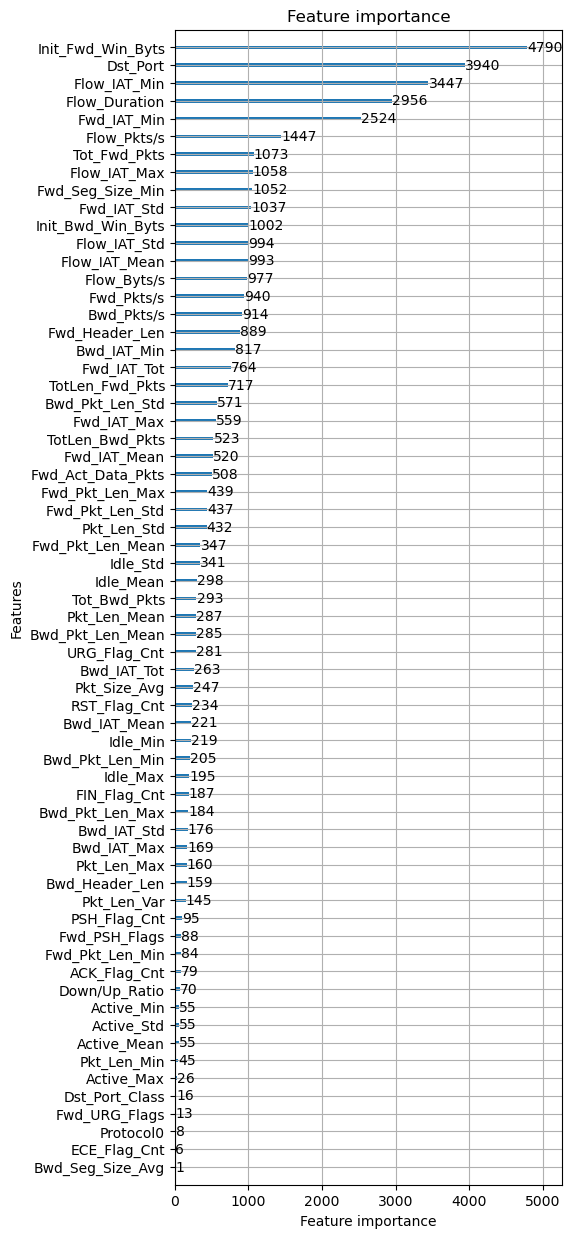

In [15]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(5,15))    

The above aligns with what the Mutual Information analysis revealed above

In [16]:
from CustomFunctions import printLarge

#Print important feature names in descending order
importantFeatures = clf.feature_importances_
featureNames = X_train3.columns
printLarge(pd.DataFrame({'Value':importantFeatures,'Feature':featureNames}).sort_values(by="Value",ascending=False))

,Value,Feature
57,4790,Init Fwd Win Byts
0,3940,Dst Port
19,3447,Flow IAT Min
1,2956,Flow Duration
24,2524,Fwd IAT Min
15,1447,Flow Pkts/s
2,1073,Tot Fwd Pkts
18,1058,Flow IAT Max
60,1052,Fwd Seg Size Min
22,1037,Fwd IAT Std


**Observation:** The above indicates that none of the Protocol features are important. Also, the Dst Port Class feature we defined earlier is of not much relevance either

